In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
cmap = sns.color_palette()
from matplotlib import pyplot as plt
import plotly.express as px

In [2]:
df_crypto = pd.read_csv('./Cryptocurrencies-/asset_details.csv',low_memory = False)
df_crypto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Asset_ID    14 non-null     int64  
 1   Weight      14 non-null     float64
 2   Asset_Name  14 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 468.0+ bytes


In [3]:
# Crypto Weight Stats
df_crypto['Weight'].describe()

count    14.000000
mean      2.919989
std       1.801957
min       1.098612
25%       1.655018
50%       2.238668
75%       4.116886
max       6.779922
Name: Weight, dtype: float64

In [4]:
df_crypto.head()

,Asset_ID,Weight,Asset_Name
0,2,2.397895,Bitcoin Cash
1,0,4.304065,Binance Coin
2,1,6.779922,Bitcoin
3,5,1.386294,EOS.IO
4,7,2.079442,Ethereum Classic


In [5]:
# Weighted percentage
df_crypto['Weight_Percentage'] = (df_crypto['Weight']/df_crypto['Weight'].sum()) * 100
df_crypto.sort_values('Weight',ascending = False)

,Asset_ID,Weight,Asset_Name,Weight_Percentage
2,1,6.779922,Bitcoin,16.584998
5,6,5.894403,Ethereum,14.418848
10,3,4.406719,Cardano,10.779686
1,0,4.304065,Binance Coin,10.528574
13,4,3.555348,Dogecoin,8.697068
0,2,2.397895,Bitcoin Cash,5.865715
6,9,2.397895,Litecoin,5.865715
4,7,2.079442,Ethereum Classic,5.086716
9,12,2.079442,Stellar,5.086716
8,13,1.791759,TRON,4.382990


In [6]:
# Percentage of each crypto
p=px.pie( df_crypto, values="Weight_Percentage", names = "Asset_Name",color_discrete_sequence=px.colors.sequential.RdBu )
p.update_traces(textposition='inside', textinfo='percent+label')
p.show()

In [7]:
p_one= px.bar(df_crypto,x="Asset_Name",y="Weight",color='Weight')
p_one.show()

In [15]:
# Load the train data 
train_df = pd.read_csv('./Cryptocurrencies-/supplemental_train.csv',low_memory= False)
train_df.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1632182460,3,561.0,2.079028,2.080605,2.0720,2.076458,2.804627e+05,2.075869,0.003085
1,1632182460,2,169.0,541.006000,541.200000,539.7000,540.722000,1.889432e+02,540.716930,-0.000607
2,1632182460,0,400.0,363.737500,363.900000,363.0000,363.654000,8.792685e+02,363.499554,-0.019375
3,1632182460,1,1933.0,42986.143333,43001.000000,42898.0000,42947.065566,9.183861e+01,42942.976718,-0.000374
4,1632182460,4,348.0,0.208326,0.208400,0.2078,0.208200,1.051337e+06,0.208077,-0.001233


In [16]:
# Ethereum prices
eth= train_df[train_df.Asset_ID==6].set_index('timestamp')
eth_batch = eth.iloc[-150:]
eth_batch

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
timestamp,,,,,,,,,
1642973460,6,1302.0,2420.888571,2422.040000,2415.79,2417.807143,340.417230,2418.973938,0.001000
1642973520,6,1516.0,2417.697143,2420.500000,2414.34,2416.217143,579.590657,2417.295094,0.001000
1642973580,6,993.0,2416.331429,2417.760000,2412.00,2413.520000,321.921511,2414.492939,0.001336
1642973640,6,1036.0,2413.233333,2416.500000,2411.16,2412.996667,218.385040,2413.741076,0.000687
1642973700,6,976.0,2412.665000,2416.800000,2410.46,2414.650000,370.301733,2413.548349,0.000765
...,...,...,...,...,...,...,...,...,...
1642982160,6,1463.0,2536.010022,2539.740151,2533.81,2536.742857,533.198853,2536.718534,NaN
1642982220,6,1760.0,2536.987143,2542.860000,2532.49,2534.734286,1118.252093,2536.493796,NaN
1642982280,6,1852.0,2534.857143,2545.600000,2533.03,2541.388571,821.614133,2538.550532,NaN


In [17]:
# Eth Missing Values
eth.isna().sum()

Asset_ID     0
Count        0
Open         0
High         0
Low          0
Close        0
Volume       0
VWAP         0
Target      16
dtype: int64

In [18]:
#Eth plot
import plotly.graph_objects as go
f = go.Figure(data=[go.Candlestick(x=eth_batch.index, open=eth_batch['Open'], close=eth_batch['Close'],low=eth_batch['Low'],high=eth_batch['High'],increasing_line_color= 'purple', 
                                   decreasing_line_color= 'gray')])
f.update_layout(yaxis_title="Price")
f.show()

In [19]:
# Bitcoin prices
btc = train_df[train_df.Asset_ID==1].set_index('timestamp')
btc_batch = btc.iloc[-150:]

In [20]:
#Missing Values
btc.isna().sum()

Asset_ID     0
Count        0
Open         0
High         0
Low          0
Close        0
Volume       0
VWAP         0
Target      16
dtype: int64

In [21]:
#Bitcoin Plot
g= go.Figure(data=[go.Candlestick(x=btc_batch.index,open=btc_batch['Open'],close=btc_batch['Close'],high=btc_batch['High'],low=btc_batch['Low'],increasing_line_color= 'purple', decreasing_line_color= 'gray')])
g.update_layout(yaxis_title='Price')
g.show()

In [22]:
#Cardano Prices
card = train_df[train_df.Asset_ID==3].set_index('timestamp')
card_batch = card.iloc[-150:]

In [23]:
#Missing Values
card.isna().sum()

Asset_ID     0
Count        0
Open         0
High         0
Low          0
Close        0
Volume       0
VWAP         0
Target      28
dtype: int64

In [24]:
#Cardano Plot
c = go.Figure(data=[go.Candlestick(x=card_batch.index,open=card_batch['Open'],close=card_batch['Close'],low=card_batch['Low'],high=card_batch['High'],increasing_line_color='purple',decreasing_line_color='gray')])
c.update_layout(yaxis_title='Price')
c.show()

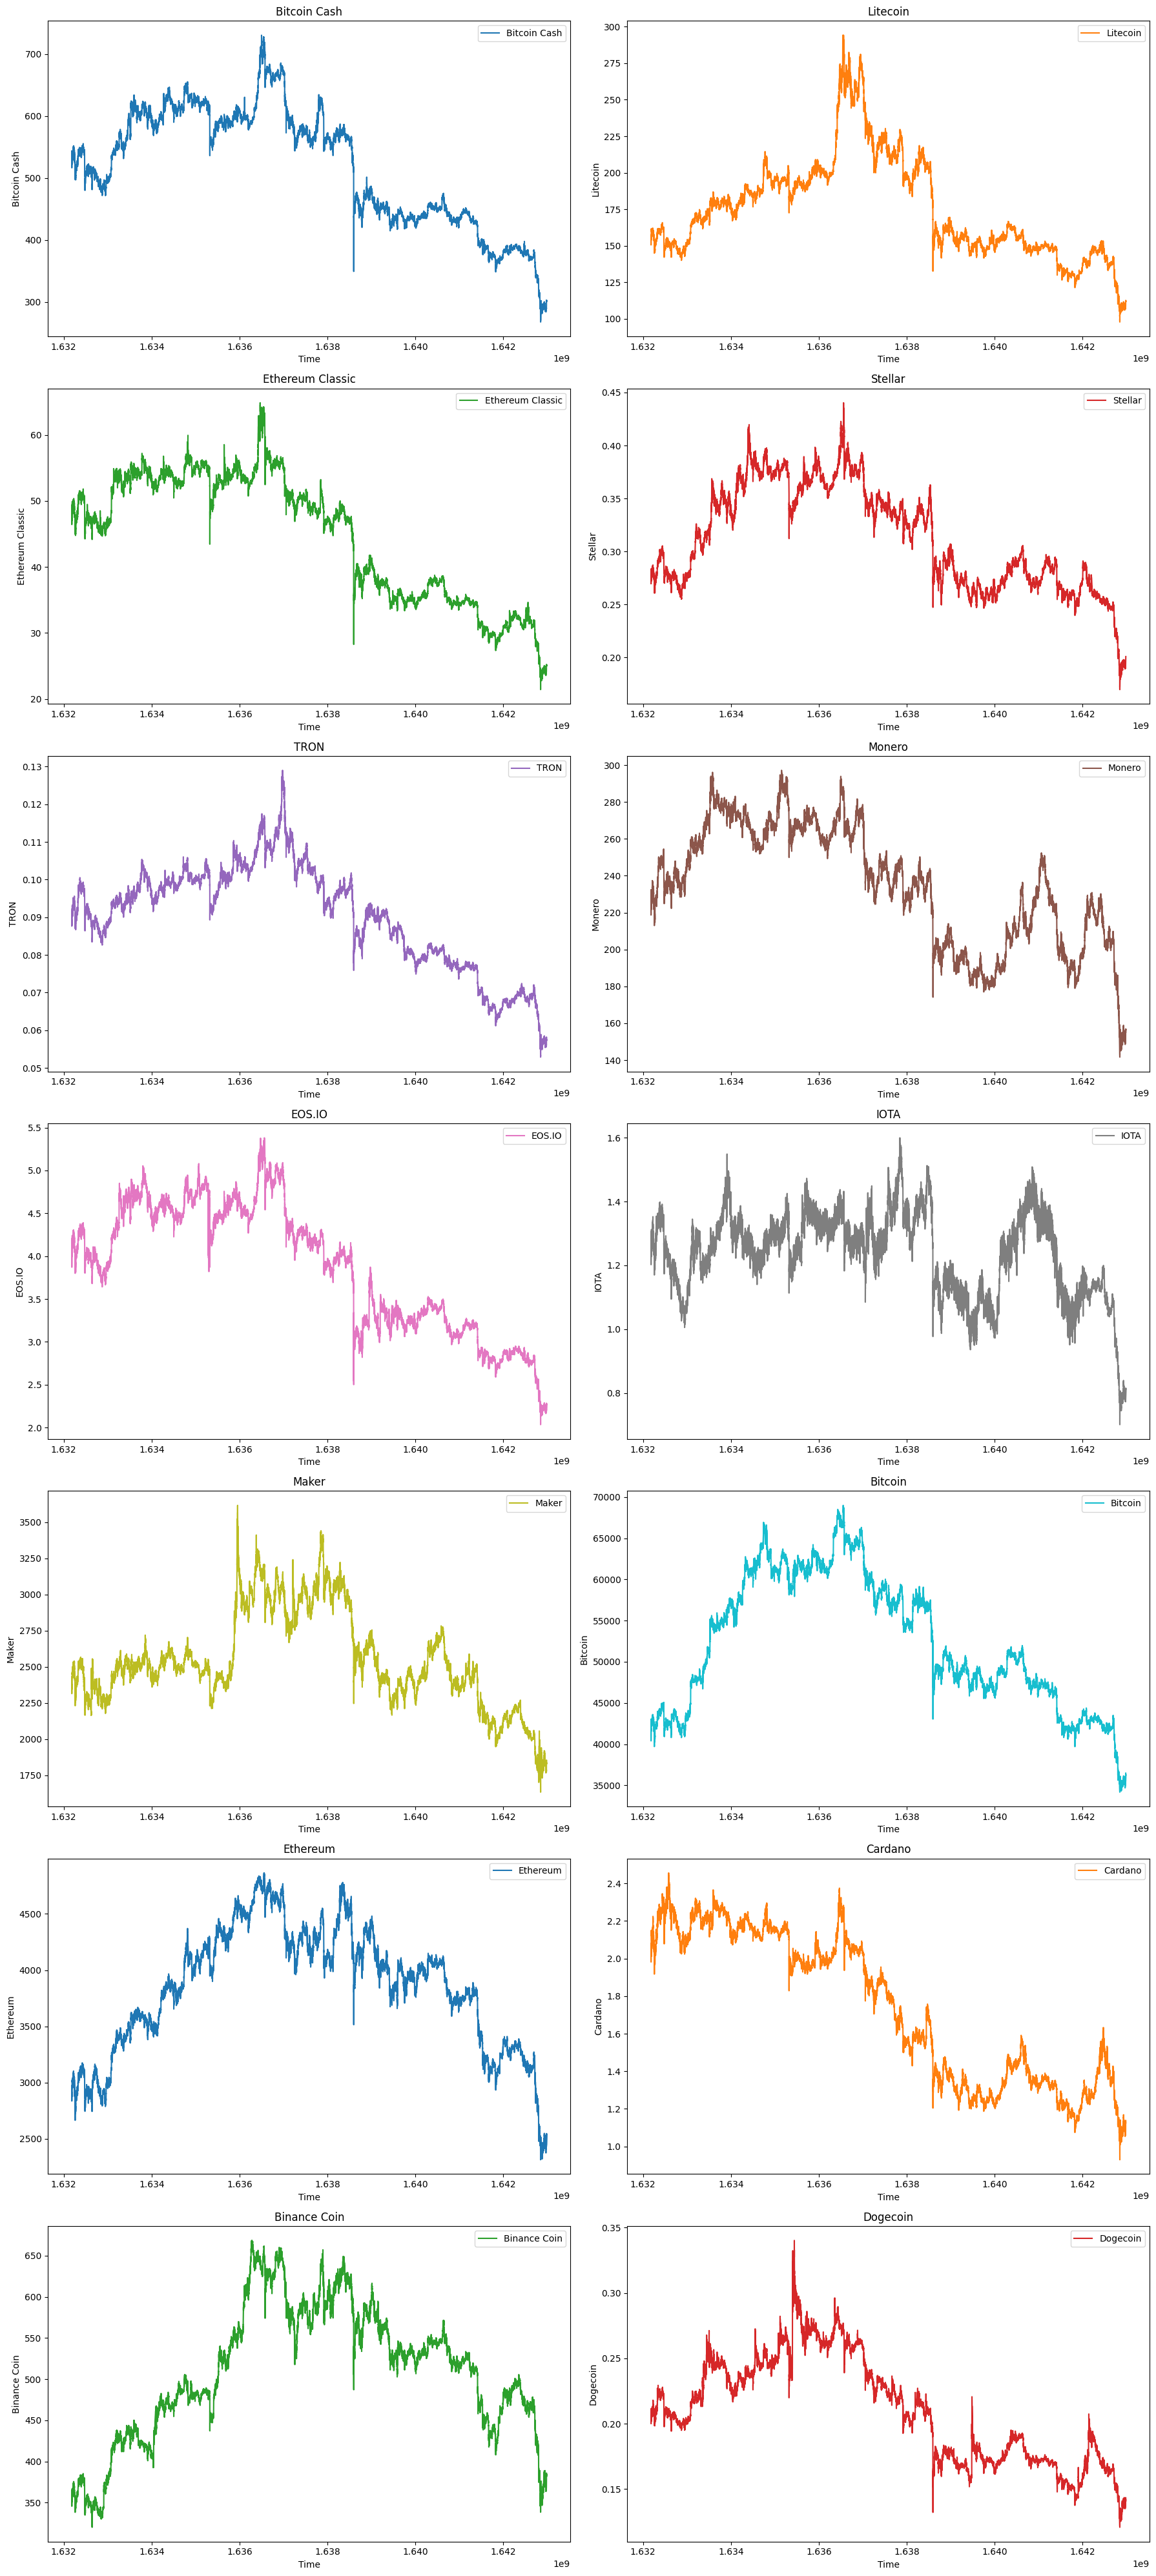

In [25]:
# Open prices for all the assets
dict1= {row['Asset_Name']:row['Asset_ID'] for i,row in df_crypto.iterrows()}
asset_names = [
    'Bitcoin Cash',
    'Litecoin',
    'Ethereum Classic',
    'Stellar',
    'TRON',
    'Monero',
    'EOS.IO',
    'IOTA',
    'Maker',
    'Bitcoin',
    'Ethereum',
    'Cardano',
    'Binance Coin',
    'Dogecoin'
    
]
f2= plt.figure(figsize=(18,40))
for i,asset in enumerate(asset_names):
    c = train_df[train_df['Asset_ID']==dict1[asset]].set_index('timestamp')
    
    c = c.reindex(range(c.index[0],c.index[-1]+60,60),method='pad')
    
    ax = f2.add_subplot(7,2,i+1)
    plt.plot(c['Open'],label=asset,color=cmap[i%10])
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel(asset)
    plt.title(asset)
    
plt.tight_layout()
plt.show()

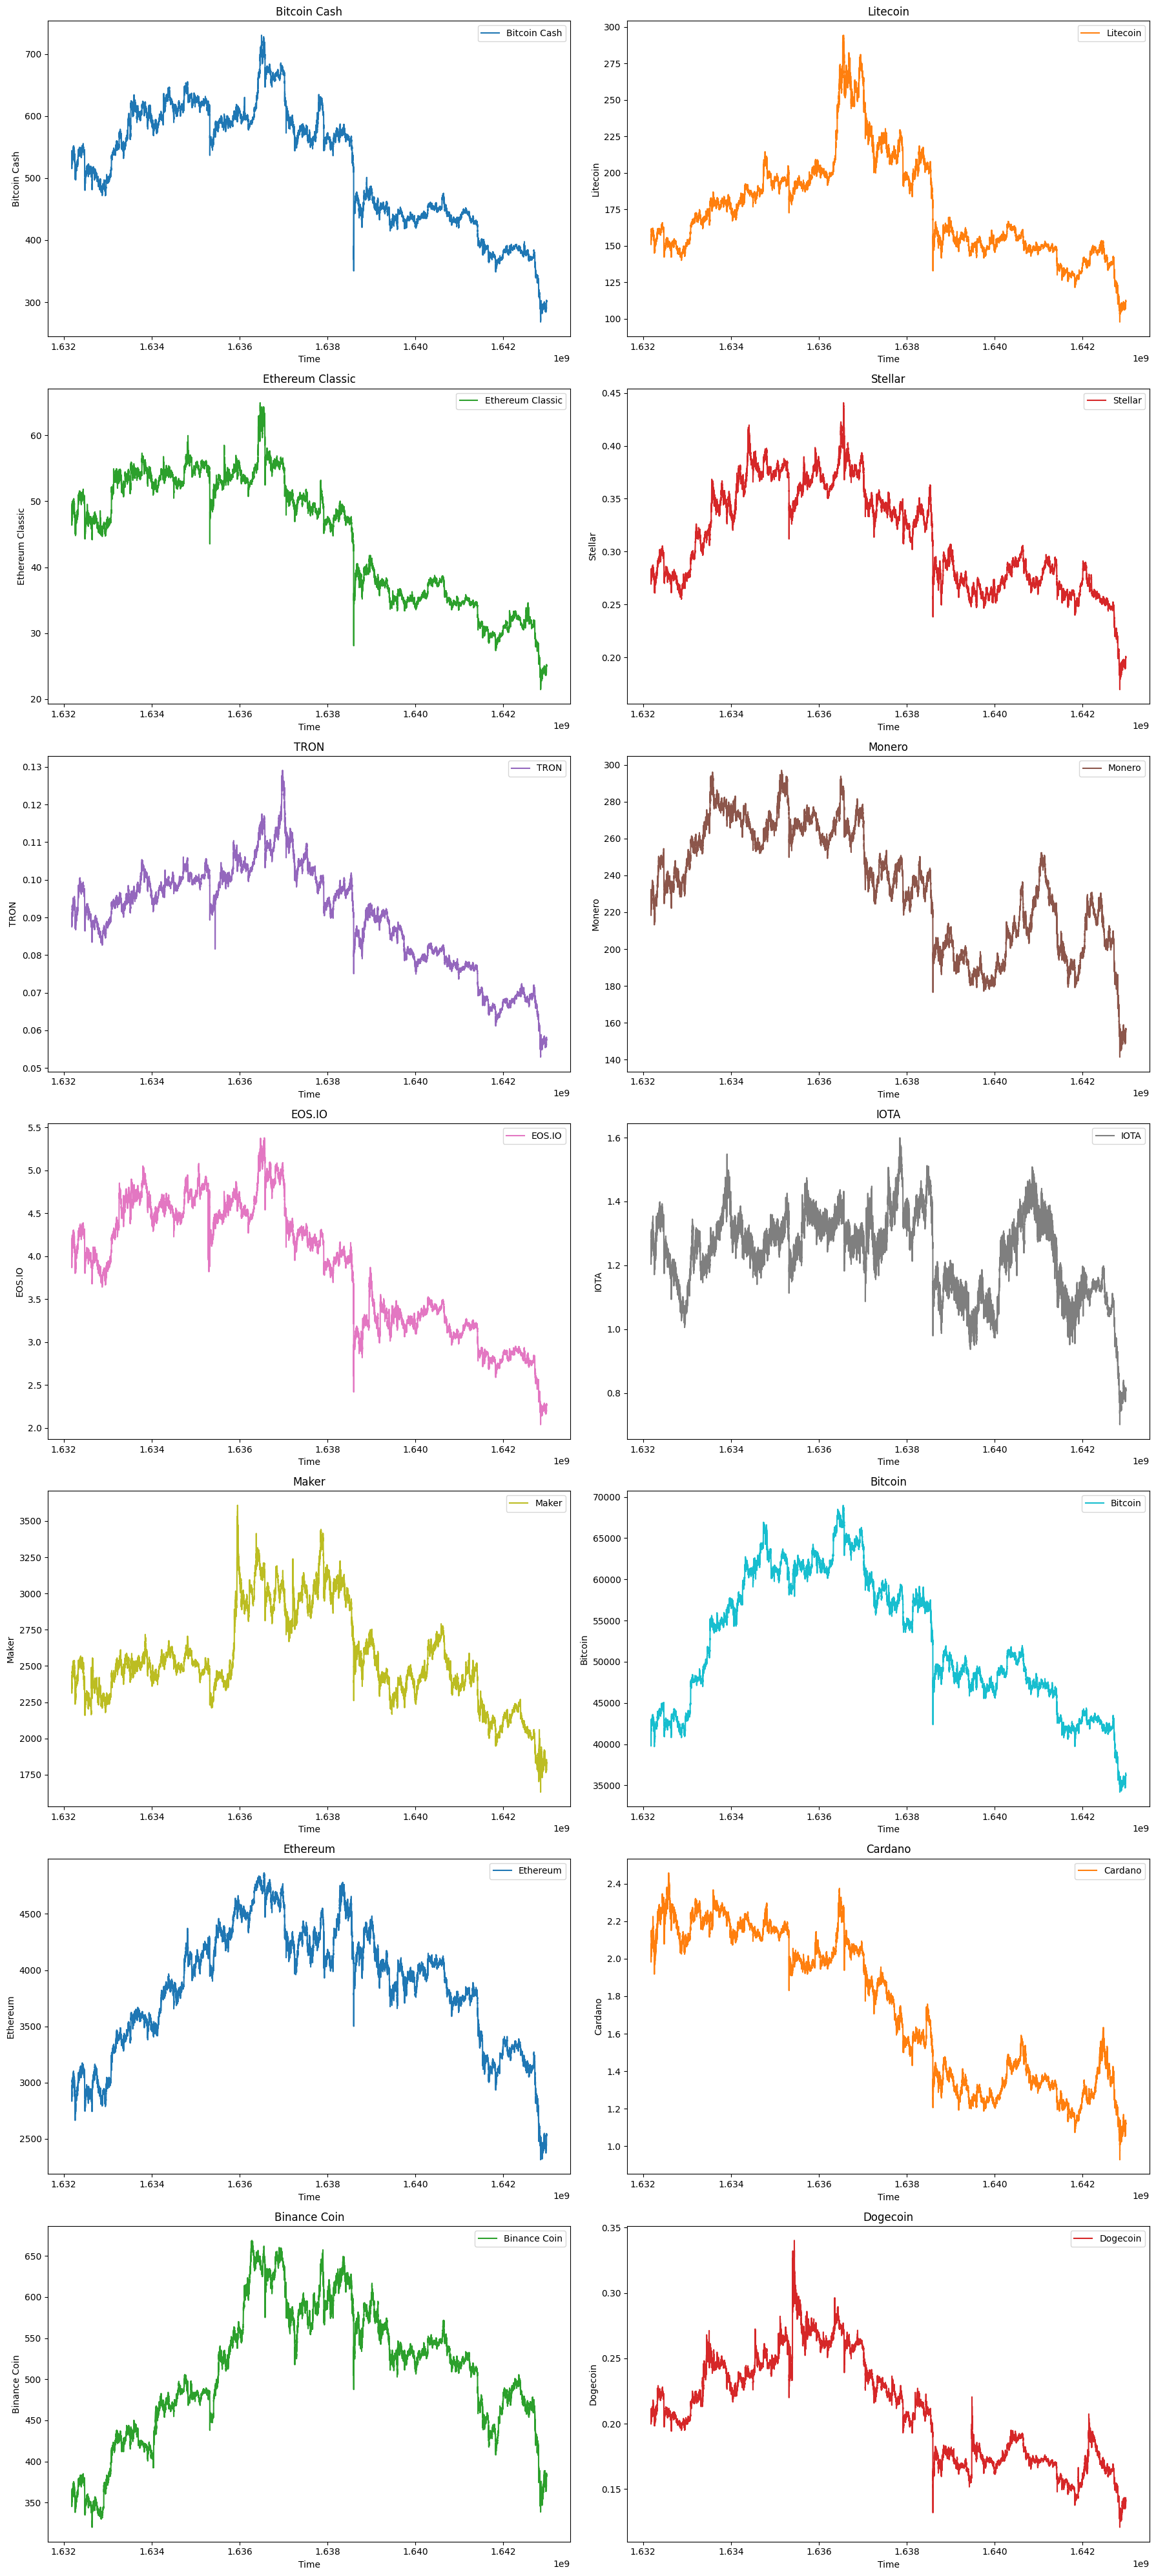

In [26]:
# High Prices of All the assets
f3= plt.figure(figsize=(18,40))
for i,asset in enumerate(asset_names):
    c = train_df[train_df['Asset_ID']==dict1[asset]].set_index('timestamp')
    
    c = c.reindex(range(c.index[0],c.index[-1]+60,60),method='pad')
    
    ax = f3.add_subplot(7,2,i+1)
    plt.plot(c['Close'],label=asset,color=cmap[i%10])
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel(asset)
    plt.title(asset)
    
plt.tight_layout()

plt.show()